<a href="https://colab.research.google.com/github/pierredevillers/DMML2022_Coop/blob/main/Classic_models/Project_Coop_2022_ClassicModels_NoDataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Data Mining and Machine Learning -- Introduction

## Detecting Difficulty Level of French Texts

### Step by step guidelines

The following are a set of step by step guidelines to help you get started with your project for the Data Mining and Machine Learning class. 
To test what you learned in the class, we will hold a competition. You will create a classifier that predicts how the level of some text in French (A1,..., C2). The team with the highest rank will get some goodies in the last class (some souvenirs from tech companies: Amazon, LinkedIn, etc).

**2 people per team**

Choose a team here:
https://moodle.unil.ch/mod/choicegroup/view.php?id=1305831


#### 1. 📂 Create a public GitHub repository for your team using this naming convention `DMML2022_[your_team_name]` with the following structure:
- data (folder) 
- code (folder) 
- documentation (folder)
- a readme file (.md): *mention team name, participants, brief description of the project, approach, summary of results table and link to the explainatory video (see below).*

All team members should contribute to the GitHub repository.

#### 2. 🇰 Join the competititon on Kaggle using the invitation link we sent on Slack.

Under the Team tab, save your team name (`UNIL_your_team_name`) and make sure your team members join in as well. You can merge your user account with your teammates in order to create a team.

#### 3. 📓 Read the data into your colab notebook. There should be one code notebook per team, but all team members can participate and contribute code. 

You can use either direct the Kaggle API and your Kaggle credentials (as explained below and **entirely optional**), or dowload the data form Kaggle and upload it onto your team's GitHub repository under the data subfolder.

#### 4. 💎 Train your models and upload the code under your team's GitHub repo. Set the `random_state=0`.
- baseline
- logistic regression with TFidf vectoriser (simple, no data cleaning)
- KNN & hyperparameter optimisation (simple, no data cleaning)
- Decision Tree classifier & hyperparameter optimisation (simple, no data cleaning)
- Random Forests classifier (simple, no data cleaning)
- another technique or combination of techniques of your choice

BE CREATIVE! You can use whatever method you want, in order to climb the leaderboard. The only rule is that it must be your own work. Given that, you can use all the online resources you want. 

#### 5. 🎥 Create a YouTube video (10-15 minutes) of your solution and embed it in your notebook. Explain the algorithms used and the evaluation of your solutions. *Select* projects will also be presented live by the group during the last class.


### Submission details (one per team)

1. Download a ZIPped file of your team's repository and submit it in Moodle here. IMPORTANT: in the comment of the submission, insert a link to the repository on Github.
https://moodle.unil.ch/mod/assign/view.php?id=1305833



### Grading (one per team)
- 20% Kaggle Rank
- 50% code quality (using classes, splitting into proper files, documentation, etc)
- 15% github quality (include link to video, table with progress over time, organization of code, images, etc)
- 15% video quality (good sound, good slides, interesting presentation).

# 2 No Data Cleaning - Classic Models

## Some further details for points 3 and 4 above.

### 3. Read data into the notebook with the Kaggle API


In [ ]:
# reading in the data via the Kaggle API

# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# install Kaggle
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Log into your Kaggle account, go to Account > API > Create new API token. You will obtain a kaggle.json file, which you save on your Google Drive directy in my drive.

In [ ]:
#Vanja
!mkdir train

In [ ]:
# Pierre
!mkdir ~/.kaggle

In [ ]:
#read in your Kaggle credentials from Google Drive
!cp /content/drive/MyDrive/Colab_Notebooks/kaggle.json ~/.kaggle/kaggle.json


In [ ]:
# download the dataset from the competition page
! kaggle competitions download -c detecting-french-texts-difficulty-level-2022

100% 303k/303k [00:00<00:00, 455kB/s]
100% 303k/303k [00:00<00:00, 455kB/s]


In [ ]:
# from zipfile import ZipFile
# import zipfile

# pd.read_csv(zip_file.open("training_data.csv"))


In [ ]:
! unzip detecting-french-texts-difficulty-level-2022.zip -d train

Archive:  detecting-french-texts-difficulty-level-2022.zip
  inflating: train/sample_submission.csv  
  inflating: train/training_data.csv  
  inflating: train/unlabelled_test_data.csv  


In [ ]:
# Import required packages

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set_style("whitegrid")

# import some additional packages
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
# read in your training data

import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/pierredevillers/DMML2022_Coop/main/CSV_files/training_data.csv')

In [ ]:
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [ ]:
df.difficulty.value_counts()

A1    813
C2    807
C1    798
B1    795
A2    795
B2    792
Name: difficulty, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


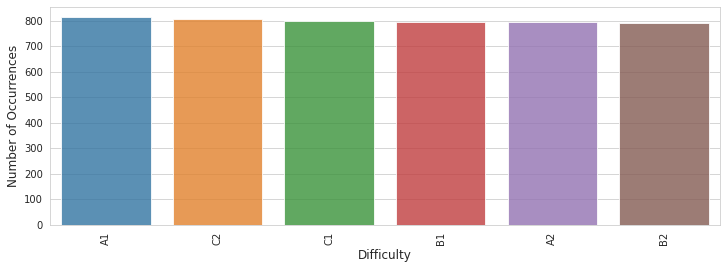

In [ ]:
# Plot number of difficuly sentnces
cnt_pro = df['difficulty'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Difficulty', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.isnull().sum()

id            0
sentence      0
difficulty    0
dtype: int64

Have a look at the data on which to make predictions.

In [ ]:
df_pred = pd.read_csv('https://raw.githubusercontent.com/pierredevillers/DMML2022_Coop/main/CSV_files/unlabelled_test_data.csv')
df_pred.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


And this is the format for your submissions.

In [ ]:
df_example_submission = pd.read_csv('https://raw.githubusercontent.com/pierredevillers/DMML2022_Coop/main/CSV_files/sample_submission.csv')
df_example_submission.head()

,id,difficulty
0,0,A1
1,1,A1
2,2,A1
3,3,A1
4,4,A1


# 4 Train the models

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)

## 4.1.Baseline
What is the baseline for this classification problem?
> Base Rate = (most frequent class) / (total observations)

In [ ]:
df.difficulty.value_counts()

A1    813
C2    807
C1    798
B1    795
A2    795
B2    792
Name: difficulty, dtype: int64

In [ ]:
base_rate = np.max(df.difficulty.value_counts()/df.difficulty.shape[0]) 
# Good if the base rate is arount 0.1666
print(f"Base rate:\n{base_rate:.4f}")

Base rate:
0.1694


#### Encode column difficulty 

In [ ]:
# import some additional packages
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

#Use Label Encoder for the level 
oe=OrdinalEncoder()
# set the order of your categories
oe.set_params(categories= [[ 'A1', 'A2', 'B1', 'B2', 'C1', 'C2']])

# fit-transform a dataframe of the categorical age variable
oe_difficulty = oe.fit_transform(df[['difficulty']])

df['oe_difficulty'] = pd.DataFrame(oe_difficulty).astype('int')
df.oe_difficulty.value_counts()

0    813
5    807
4    798
2    795
1    795
3    792
Name: oe_difficulty, dtype: int64

In [ ]:
oe_difficulty = pd.DataFrame(oe_difficulty, columns=['oe_difficulty']).astype('int')
oe_difficulty.value_counts()

oe_difficulty
0                813
5                807
4                798
1                795
2                795
3                792
dtype: int64

In [ ]:
df.head()

,id,sentence,difficulty,oe_difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1,4
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1,0
2,2,Le test de niveau en français est sur le site ...,A1,0
3,3,Est-ce que ton mari est aussi de Boston?,A1,0
4,4,"Dans les écoles de commerce, dans les couloirs...",B1,2


#### Prepare the Data

##### Give X and Y a value


In [ ]:
#Give X and Y value
y = df.oe_difficulty
X = df.sentence
X.head()

0    Les coûts kilométriques réels peuvent diverger...
1    Le bleu, c'est ma couleur préférée mais je n'a...
2    Le test de niveau en français est sur le site ...
3             Est-ce que ton mari est aussi de Boston?
4    Dans les écoles de commerce, dans les couloirs...
Name: sentence, dtype: object

### 4.1 Train/test splitting: split the data into 80% training and 20% test set. Remember to set the random seed to 50.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
y_train

70      0
4347    3
1122    4
4570    0
34      5
       ..
1033    3
3264    1
1653    4
2607    3
2732    2
Name: oe_difficulty, Length: 3840, dtype: int64

Definitions

In [ ]:
def evaluate(test, pred):
  accuracy = accuracy_score(test, pred)
  precision = precision_score(test, pred, average='macro')
  recall = recall_score(test, pred, average='macro')
  f1= f1_score(test, pred, average='macro')
  return accuracy, precision, recall, f1
  print(f'CONFUSION MATRIX:\n{confusion_matrix(test, pred)}')
  print(f"ACCURACY SCORE:\n{accuracy:.6f}")
  print(f'CLASSIFICATION REPORT:\n\tPrecision: {precision:.6f}\n\tRecall: {recall:.6f}\n\tF1_Score: {f1:.6f}')

def accuracy_conf_mat(y_test, y_pred):
  print(round(accuracy_score(y_test, y_pred), 4))
  conf_mat = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

#### 4.2. Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf = TfidfVectorizer()


logreg = LogisticRegression(solver = 'lbfgs', random_state=0)

pipe_logreg = Pipeline([('vectorizer', tfidf),
                 ('classifier', logreg)])

pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(random_state=0))])

In [ ]:
y_pred_logreg = pipe_logreg.predict(X_test)

Calculate accuracy, precision, recall and F1 score on the test set.



##### Accuracy scores on Test set

In [ ]:
test_acc_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"TEST ACCURACY SCORE:\n{test_acc_logreg:.6f}")

TEST ACCURACY SCORE:
0.466667


###Test Hyperparameter

Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

0.4667


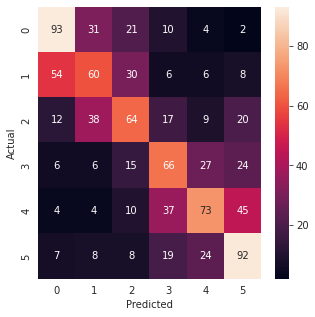

In [ ]:
report_logreg_pred= evaluate(y_test, y_pred_logreg)
report_logreg_pred
accuracy_conf_mat(y_test, y_pred_logreg)

In [ ]:
report = pd.DataFrame()
report.index = ['Accuracy Score', 'Precision Score','Recall Score', 'F1 Score']
report['Logistic Regression']=report_logreg_pred

In [ ]:
report

,Logistic Regression
Accuracy Score,0.466667
Precision Score,0.464496
Recall Score,0.467678
F1 Score,0.464014


Generate the first predictions on the `unlabelled_test_data.csv`

In [ ]:
df_pred

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."
...,...,...
1195,1195,C'est un phénomène qui trouve une accélération...
1196,1196,Je vais parler au serveur et voir si on peut d...
1197,1197,Il n'était pas comme tant de gens qui par pare...
1198,1198,Ils deviennent dangereux pour notre économie.


In [ ]:
x_new = df_pred.sentence
y_new_pred = pipe_logreg.predict(x_new)
df_pred['difficulty'] = y_new_pred.tolist()
df_pred['difficulty'] = df_pred['difficulty'].replace({0:'A1', 1:'A2', 2: 'B1', 3:'B2', 4:'C1', 5:'C2'})

df_pred

,id,sentence,difficulty
0,0,Nous dûmes nous excuser des propos que nous eû...,C2
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...,A2
2,2,"Et, paradoxalement, boire froid n'est pas la b...",A1
3,3,"Ce n'est pas étonnant, car c'est une saison my...",A1
4,4,"Le corps de Golo lui-même, d'une essence aussi...",C2
...,...,...,...
1195,1195,C'est un phénomène qui trouve une accélération...,C2
1196,1196,Je vais parler au serveur et voir si on peut d...,A2
1197,1197,Il n'était pas comme tant de gens qui par pare...,C2
1198,1198,Ils deviennent dangereux pour notre économie.,C1


In [ ]:
df_pred = df_pred.drop(columns=['sentence'])

In [ ]:
df_pred

,id,difficulty
0,0,C2
1,1,A2
2,2,A1
3,3,A1
4,4,C2
...,...,...
1195,1195,C2
1196,1196,A2
1197,1197,C2
1198,1198,C1


In [ ]:
df_pred.to_csv('Group_Coop.csv', index=False)


#### 4.3. KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer()

knn = KNeighborsClassifier()

pipe_knn = Pipeline([('vectorizer', tfidf),
                 ('classifier', knn)])

pipe_knn.fit(X_train, y_train)

y_pred_knn = pipe_knn.predict(X_test)


0.3188


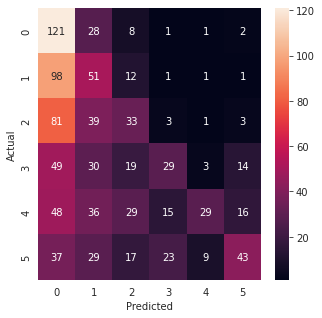

In [ ]:
evaluate(y_test, y_pred_knn)

accuracy_conf_mat(y_test, y_pred_knn)

In [ ]:
grid = {'n_neighbors':np.arange(1,20),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

knn_cv = GridSearchCV(knn, grid, cv=5)

pipe_knn_cv = Pipeline([('vectorizer', tfidf),
                 ('classifier', knn_cv)])

pipe_knn_cv.fit(X_train, y_train)

pipe_knn_cv_best_params =knn_cv.best_params_

print("Hyperparameters:", pipe_knn_cv_best_params)

Hyperparameters: {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}


Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [ ]:
best_param_knn = pipe_knn_cv_best_params['n_neighbors']

In [ ]:
knn_opt = KNeighborsClassifier(n_neighbors = best_param_knn, p=2, weights='distance')

pipe_knn_opt = Pipeline([('vectorizer', tfidf),
                 ('classifier', knn_opt)])

pipe_knn_opt.fit(X_train, y_train)

y_pred_knn_opt = pipe_knn_opt.predict(X_test)


0.3542


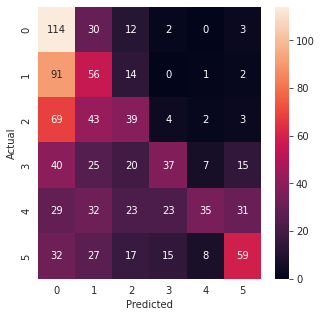

In [ ]:
report_knn_pred=evaluate(y_test, y_pred_knn_opt)
report_knn_pred
accuracy_conf_mat(y_test, y_pred_knn_opt)

In [ ]:
report['KNN']=report_knn_pred


In [ ]:
report['KNN']

Accuracy Score     0.354167
Precision Score    0.419700
Recall Score       0.354327
F1 Score           0.345031
Name: KNN, dtype: float64

#### 4.4. Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

0.3073


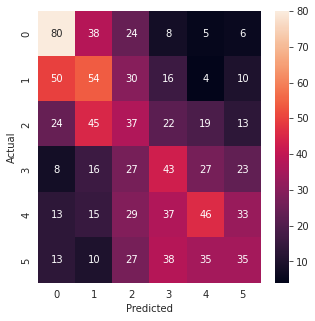

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tfidf = TfidfVectorizer()

tree = DecisionTreeClassifier()

pipe_tree = Pipeline([('vectorizer', tfidf),
                 ('classifier', tree)])

pipe_tree.fit(X_train, y_train)

y_pred_tree = pipe_tree.predict(X_test)

evaluate(y_test, y_pred_tree)
accuracy_conf_mat(y_test, y_pred_tree)

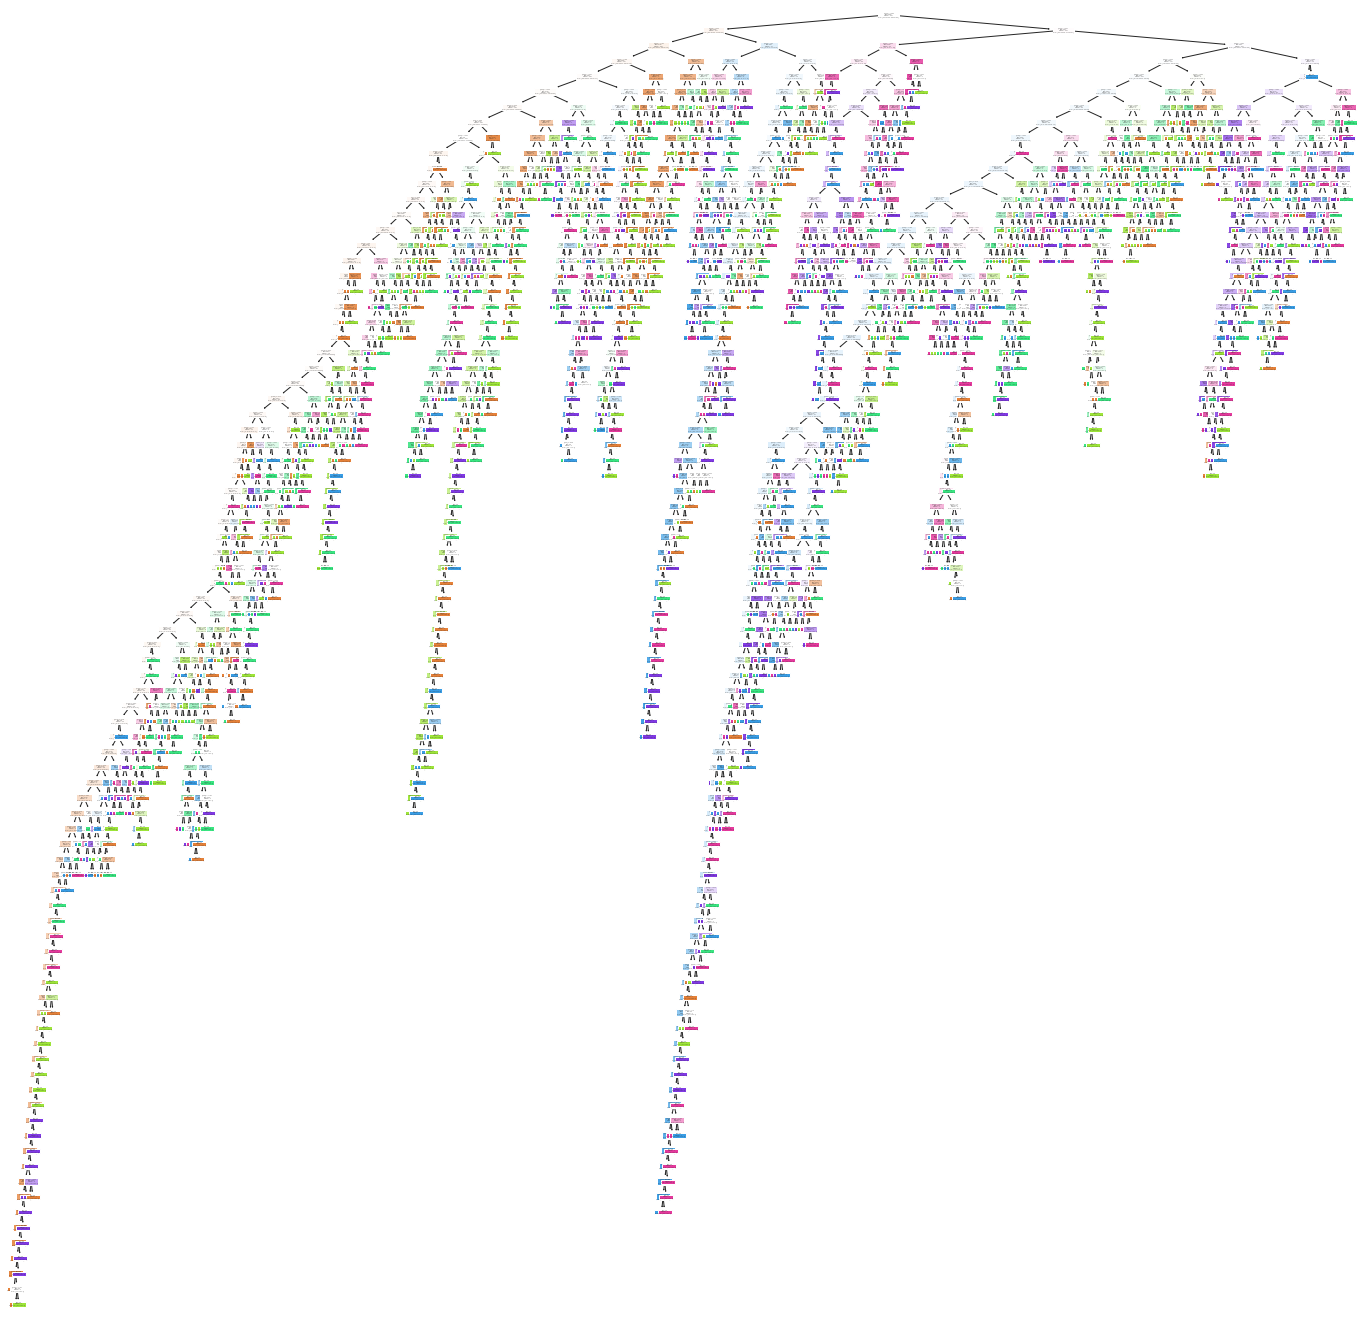

In [ ]:
plt.figure(figsize=(24, 24))
plot_tree(tree, filled=True);

Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

In [ ]:
grid = {'max_depth':np.arange(1,20)}

tree_cv = GridSearchCV(tree, grid, cv=5)

pipe_tree_cv = Pipeline([('vectorizer', tfidf),
                 ('classifier', tree_cv)])
pipe_tree_cv.fit(X_train, y_train)

pipe_tree_cv_best_params=tree_cv.best_params_

# Print results
print("Hyperparameters:", tree_cv.best_params_)

Hyperparameters: {'max_depth': 12}


In [ ]:
best_param_tree = pipe_tree_cv_best_params['max_depth']

In [ ]:
tree_opt = DecisionTreeClassifier(max_depth=best_param_tree)

pipe_tree_opt = Pipeline([('vectorizer', tfidf),
                 ('classifier', tree_opt)])

pipe_tree_opt.fit(X_train, y_train)

y_pred_tree_opt = pipe_tree_opt.predict(X_test)

0.3135


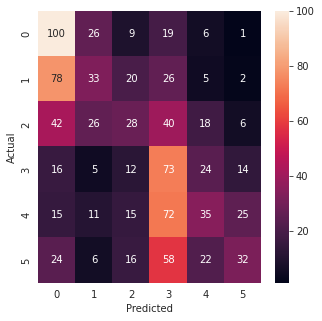

In [ ]:
report_tree_pred=evaluate(y_test, y_pred_tree_opt)
report_tree_pred
accuracy_conf_mat(y_test, y_pred_tree_opt)

In [ ]:
report['Decision Tree']=report_tree_pred
report['Decision Tree']

Accuracy Score     0.406250
Precision Score    0.401299
Recall Score       0.408124
F1 Score           0.391239
Name: Decision Tree, dtype: float64

#### 4.5. Random Forest Classifier 

---

(without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

0.4219


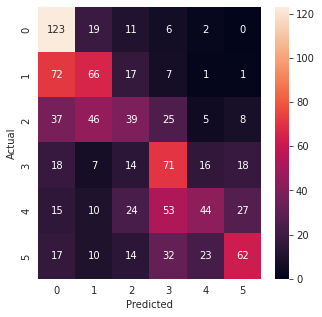

In [ ]:
from sklearn.ensemble import RandomForestClassifier

tfidf = TfidfVectorizer()

rfc = RandomForestClassifier()

pipe_rfc = Pipeline([('vectorizer', tfidf),
                 ('classifier', rfc)])

pipe_rfc.fit(X_train, y_train)

y_pred_rfc = pipe_rfc.predict(X_test)

evaluate(y_test, y_pred_rfc)
accuracy_conf_mat(y_test, y_pred_rfc)

In [ ]:
grid = {'max_depth':np.arange(1,50)}

rfc_cv = GridSearchCV(rfc, grid, cv=5)

pipe_rfc_cv = Pipeline([('vectorizer', tfidf),
                 ('classifier', rfc_cv)])

pipe_rfc_cv.fit(X_train, y_train)

pipe_rfc_cv_best_params = rfc_cv.best_params_

# Print results
print("Hyperparameters:", rfc_cv.best_params_)

Hyperparameters: {'max_depth': 43}


In [ ]:
best_param_rfc = pipe_rfc_cv_best_params['max_depth']

In [ ]:
rfc_opt = RandomForestClassifier(max_depth=best_param_rfc)

pipe_rfc_opt = Pipeline([('vectorizer', tfidf),
                 ('classifier', rfc_opt)])

pipe_rfc_opt.fit(X_train, y_train)

y_pred_rfc_opt = pipe_rfc_opt.predict(X_test)

0.4062


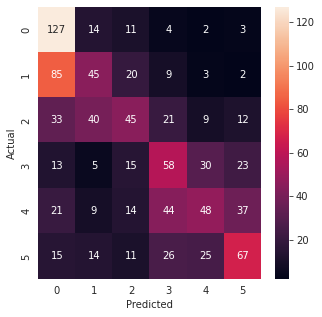

In [ ]:
report_tree_pred= evaluate(y_test, y_pred_rfc_opt)
report_tree_pred
accuracy_conf_mat(y_test, y_pred_rfc_opt)

In [ ]:
report['Random Forests']=report_tree_pred

In [ ]:
report['Random Forests']

Accuracy Score     0.406250
Precision Score    0.401299
Recall Score       0.408124
F1 Score           0.391239
Name: Random Forests, dtype: float64

# Summarize 
---
(without data cleaning)

In [ ]:
report
 

,Logistic Regression,KNN,Random Forests,Decision Tree
Accuracy Score,0.466667,0.354167,0.406250,0.406250
Precision Score,0.464496,0.419700,0.401299,0.401299
Recall Score,0.467678,0.354327,0.408124,0.408124
F1 Score,0.464014,0.345031,0.391239,0.391239


In [ ]:
report_transposed = report.T

Text(0, 0.5, 'Score')

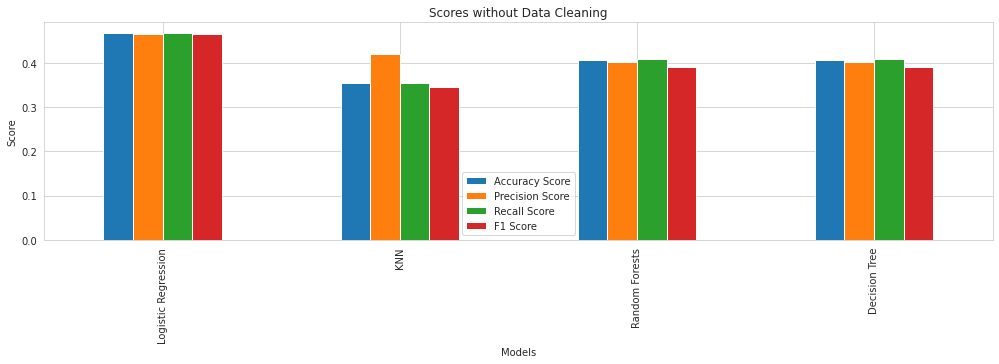

In [ ]:
report_transposed.plot(kind="bar", figsize=(17,4))
plt.title("Scores without Data Cleaning")
plt.xlabel("Models")
plt.ylabel("Score")
